In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
plt.style.use('seaborn-deep')
plt.style.use("seaborn-darkgrid")

In [3]:
df = pd.read_csv('../data/train.csv')
df.drop('id', axis=1, inplace=True)
new_columns = ['weight', 'quality', 'color', 'clarity', 'depth', 'table_percent', 'x', 'y', 'z', 'price']
df.columns = new_columns
df['depth'] = df['depth'] / 100
df['table_percent'] = df['table_percent'] / 100
df['depth_percent'] = (2 * df['z'] / (df['x'] + df['y'])).round(3) #total depth percentage = z / mean(x, y) = 2 * z / (x + y)
df['diff_depth_abs'] = abs(df['depth'] - df['depth_percent']) #abs difference between depth and depth percentage
df['diff_depth_perc'] = (abs(df['depth'] - df['depth_percent']) / df['depth']) * 100 #percentage difference between depth and depth percentage
df.drop(df.loc[df['x'] == 0].index, inplace=True) #drop rows with x = 0
df.drop(df.loc[df['y'] == 0].index, inplace=True) #drop rows with y = 0
df.drop(df.loc[df['z'] == 0].index, inplace=True) #drop rows with z = 0
df.drop(df.loc[df['diff_depth_perc'] > 1].index, inplace=True) #drop rows difference > +/-1%
df.drop(['depth', 'x', 'y', 'z', 'diff_depth_abs', 'diff_depth_perc'], axis=1, inplace=True) #drop depth, x, y, z, diff_depth_abs, diff_depth_perc

#remove duplicated rows rounded to 2 decimal places [weight, price]
round_duplicated = df.drop(['table_percent', 'depth_percent'], axis=1)
round_duplicated['price'] = round_duplicated['price'].round(2)
print(round_duplicated.duplicated().sum(), 'duplicated rows by round(2)')
round_duplicated = round_duplicated.loc[round_duplicated.duplicated() == True]
df.drop(round_duplicated.index, axis=0, inplace=True)

#split categorical and numerical variables
col_num = df.select_dtypes(include = np.number).columns
col_cat = df.select_dtypes(include = 'object').columns
print('numerical columns:', col_num)
print('categorical columns:', col_cat)
print('numerical shape:', df.shape)
df.sample(5)

11036 duplicated rows by round(2)
numerical columns: Index(['weight', 'table_percent', 'price', 'depth_percent'], dtype='object')
categorical columns: Index(['quality', 'color', 'clarity'], dtype='object')
numerical shape: (29311, 7)


,weight,quality,color,clarity,table_percent,price,depth_percent
9467,1.18,Premium,I,SI2,0.58,8.429,0.608
3695,1.21,Ideal,E,SI1,0.56,8.866,0.623
3658,2.02,Premium,I,SI2,0.60,9.546,0.629
7827,0.57,Very Good,J,IF,0.59,7.373,0.598
5998,0.70,Premium,F,SI2,0.58,7.544,0.621


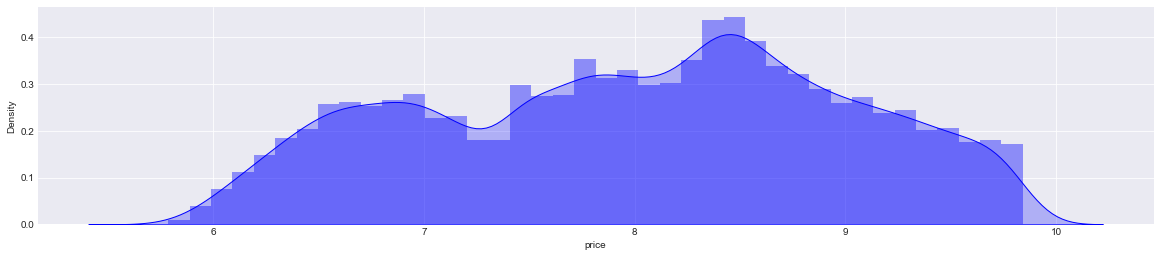

In [4]:
#plot response variable distribution
fig, axes = plt.subplots(figsize = (20, 4))
sns.distplot(df.price, hist = True, color = "blue", kde_kws = {"shade": True, "linewidth": 1});

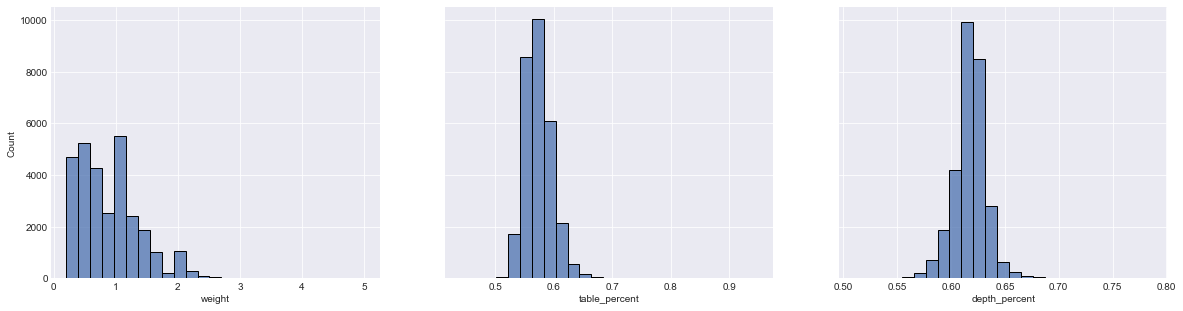

In [5]:
#plot numerical variables distribution
fig, ax = plt.subplots(1, 3, figsize = (20,5), sharey=True)
ax = ax.flat
df_num = df[col_num.drop('price')]
counter = 0
for i in df_num.columns:
    sns.histplot(df_num[i], kde = False, ax = ax[counter], bins=25)
    counter += 1
plt.show();

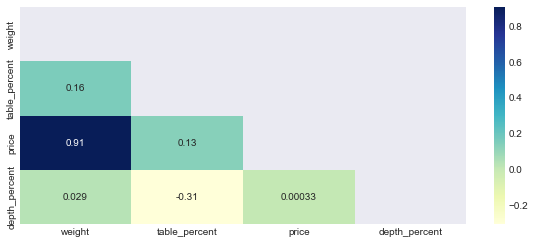

In [6]:
#headmap corr plot
fig, axes = plt.subplots(figsize = (10, 4))
mask = np.triu(np.ones_like(df[col_num].corr(), dtype = np.bool))
sns.heatmap(df[col_num].corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True);

price vs depth_percent have no correlation


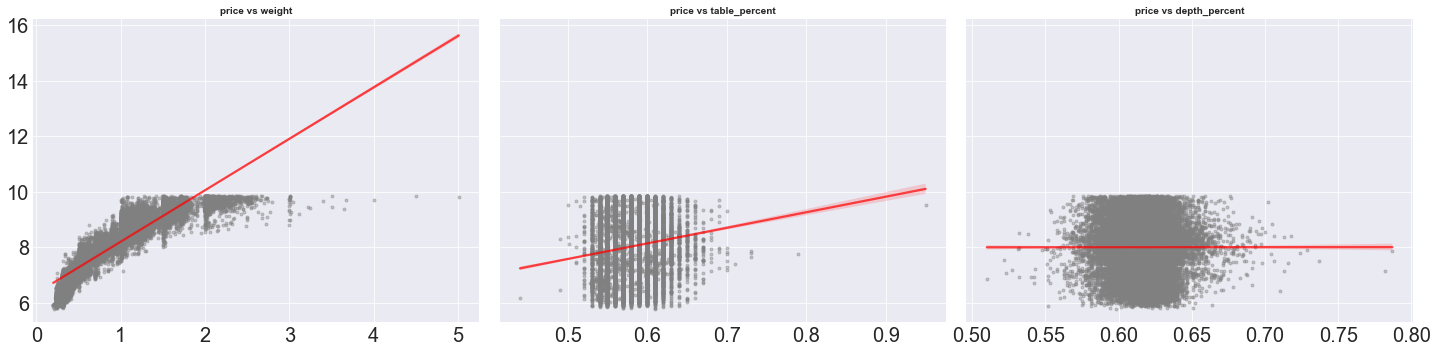

In [7]:
#plotteamos correlaciones entre variables predictoras y respuesta
fig, axes = plt.subplots(1, 3, figsize = (20,5), sharey=True)
axes = axes.flat
for i, colum in enumerate(df_num.columns):
    sns.regplot(
        x = df[colum], 
        y = df["price"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"price vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();
print('price vs depth_percent have no correlation')

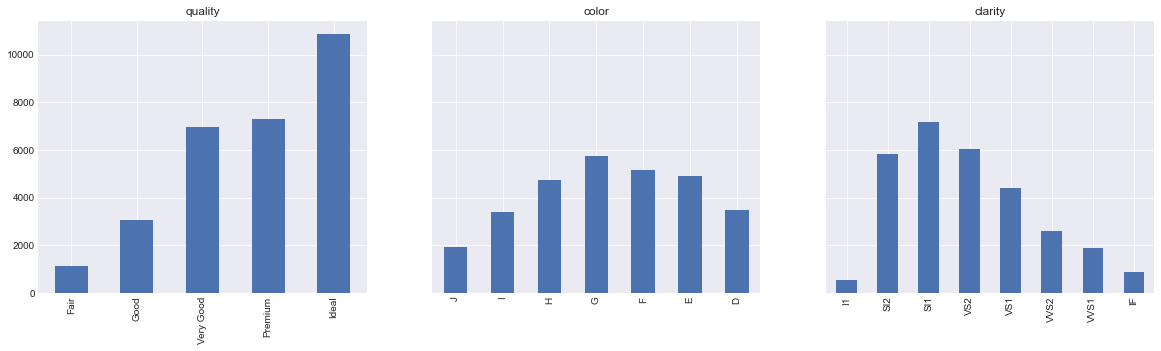

In [8]:
#plot categorical variables distribution
mapping = {'quality':['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
            'color':['J', 'I', 'H', 'G', 'F', 'E', 'D'],
            'clarity':['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}
fig, ax = plt.subplots(1, 3, figsize = (20,5), sharey=True)
ax = ax.flat
counter = 0
for i in df[col_cat].columns:
    df[i].value_counts().loc[mapping[i]].plot.bar(ax=ax[counter]).set_title(i)
    counter += 1
plt.show();    

In [9]:
df.describe(include='all').T.sort_values(by='unique', ascending=True)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
quality,29311,5,Ideal,10858,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,29311,7,G,5731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,29311,8,SI1,7158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,29311.0,NaN,NaN,NaN,0.893259,0.486163,0.2,0.5,0.81,1.14,5.01
table_percent,29311.0,NaN,NaN,NaN,0.575651,0.022973,0.44,0.56,0.57,0.59,0.95
price,29311.0,NaN,NaN,NaN,7.996602,0.991446,5.787,7.1675,8.083,8.755,9.842
depth_percent,29311.0,NaN,NaN,NaN,0.617517,0.015226,0.51,0.61,0.618,0.626,0.787


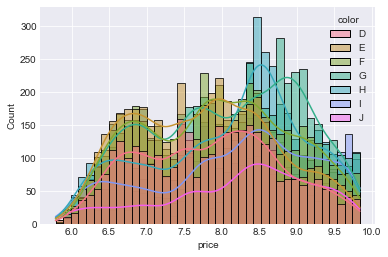

In [10]:
sns.histplot(data = df, x = df['price'], hue = "color", kde=True);

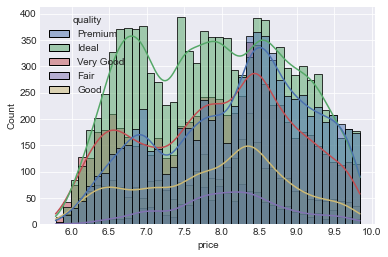

In [11]:
sns.histplot(data = df, x = df['price'], hue = "quality", kde=True);

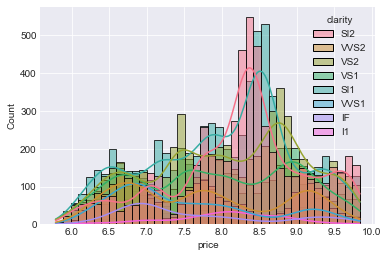

In [12]:
sns.histplot(data = df, x = df['price'], hue = "clarity", kde=True);

In [13]:
#export to csv
df.to_csv('../data/train_data_cleaned.csv', index=False)

In [14]:
df

,weight,quality,color,clarity,table_percent,price,depth_percent
0,0.30,Premium,D,SI2,0.58,6.353,0.624
1,1.01,Ideal,E,VVS2,0.56,9.183,0.627
2,0.72,Ideal,F,VS2,0.59,7.983,0.618
3,1.08,Very Good,G,SI2,0.57,8.371,0.632
4,0.36,Premium,G,VS1,0.59,6.588,0.623
...,...,...,...,...,...,...,...
40443,1.52,Premium,D,SI2,0.60,9.093,0.602
40445,0.37,Premium,F,VS2,0.59,6.545,0.605
40446,1.01,Premium,F,VS1,0.58,8.854,0.613
40452,0.80,Good,G,SI2,0.58,7.768,0.628
